## 2023 06/22 Green Tint Removal

*Last Updated*: 2023-06-22

### Authors
* Hannah Zhang (hannahzhang@ucsb.edu)


### Overview
This Jupyter notebook is intended to demonstrate

* removing green tint from hand outline generated by rembg algorithm



### Key Results

- able to isolate green color from rest of hand

In [27]:
import os
import cv2
import glob
import torch
from torchvision import transforms
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from rembg import remove
#import easygui
from PIL import Image
from numpy import asarray


In [ ]:
# im = Image.open('/Applications/DermaML/16B45EFF-7F1D-4437-B8FA-C7D4ADBF4F92.jpeg')

# output = remove(im)
# # output.show()

# numpydata = asarray(output)
# plt.imshow(numpydata)

In [14]:
#load sample images
images = []
def load_images(foldername):
    for filename in os.listdir(foldername):
        if filename == ".DS_Store":
            continue
        input = Image.open(os.path.join(foldername,filename))
        print(filename)
        
        if input is not None:
            images.append(input)
    return images
img_list = load_images("/Users/hannahzhang/Downloads/test_ims/")

16B45EFF-7F1D-4437-B8FA-C7D4ADBF4F92.jpeg
7F301A45-1207-4B6A-A05A-72B320B25E95.jpeg
6C550AAE-8181-41AA-829C-B42D255A9E2F.jpeg
5A7E3A5F-334A-4C8D-9E0D-BD435389C81E.jpeg
image007.jpg
E4FE4EBA-68AA-434C-8260-54646D0C4AC3.jpeg


In [35]:
removed_ims = []

for im in images:
    output = remove(im)
    numpydata = asarray(output)
    removed_ims.append(numpydata)
    #output.show()


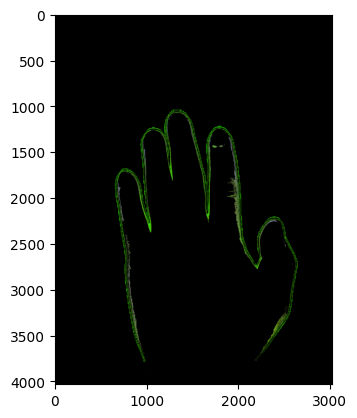

In [55]:
#frame=cv2.imread(numpydata)
hsv=cv2.cvtColor(removed_ims[4], cv2.COLOR_BGR2HSV)
l_b=np.array([20, 100, 0])
u_b=np.array([100, 300, 900])

mask=cv2.inRange(hsv,l_b,u_b)
res = cv2.bitwise_and(hsv, hsv, mask= mask)
#cv2.imshow('frame',mask)
plt.imshow(res)

In [ ]:
kernelSize = 3
# Set morph operation iterations:
opIterations = 1
# Get the structuring element:
morphKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernelSize, kernelSize))
# Perform closing:
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, morphKernel, None, None, opIterations, cv2.BORDER_REFLECT101)

# Add the white mask to the grayscale image:
colorMask = cv2.add(hsv, mask)
_, binaryImage = cv2.threshold(colorMask, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2.imwrite('bwimage.jpg',binaryImage)
thresh, im_bw = cv2.threshold(binaryImage, 210, 230, cv2.THRESH_BINARY)
kernel = np.ones((1, 1), np.uint8)
imgfinal = cv2.dilate(im_bw, kernel=kernel, iterations=1)
cv2.imshow(imgfinal)